Output from the Binaomial Tree Implementation

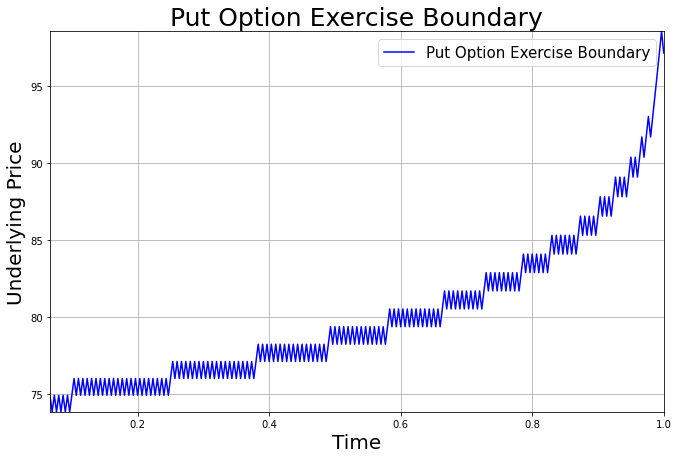

European Price = 7.459
American Price = 7.971


In [1]:
from typing import Callable, Tuple, Iterator, Sequence, List
from rl.chapter8.optimal_exercise_bin_tree import OptimalExerciseBinTree
from rl.markov_process import NonTerminal 

from rl.gen_utils.plot_funcs import plot_list_of_curves
spot_price_val: float = 100.0
strike: float = 100.0
is_call: bool = False
expiry_val: float = 1.0
rate_val: float = 0.05
vol_val: float = 0.25
num_steps_val: int = 300

if is_call:
    opt_payoff = lambda _, x: max(x - strike, 0)
else:
    opt_payoff = lambda _, x: max(strike - x, 0)

opt_ex_bin_tree: OptimalExerciseBinTree = OptimalExerciseBinTree(
    spot_price=spot_price_val,
    payoff=opt_payoff,
    expiry=expiry_val,
    rate=rate_val,
    vol=vol_val,
    num_steps=num_steps_val
)

vf_seq, policy_seq = zip(*opt_ex_bin_tree.get_opt_vf_and_policy())
ex_boundary: Sequence[Tuple[float, float]] = \
    opt_ex_bin_tree.option_exercise_boundary(policy_seq, is_call)
time_pts, ex_bound_pts = zip(*ex_boundary)
label = ("Call" if is_call else "Put") + " Option Exercise Boundary"
plot_list_of_curves(
    list_of_x_vals=[time_pts],
    list_of_y_vals=[ex_bound_pts],
    list_of_colors=["b"],
    list_of_curve_labels=[label],
    x_label="Time",
    y_label="Underlying Price",
    title=label
)

european: float = opt_ex_bin_tree.european_price(is_call, strike)
print(f"European Price = {european:.3f}")

am_price: float = vf_seq[0][NonTerminal(0)]
print(f"American Price = {am_price:.3f}")


In [ ]:
from typing import Callable, Iterable, Iterator, TypeVar, Set, Sequence, Tuple

import numpy as np

from rl.approximate_dynamic_programming import ValueFunctionApprox, \
    QValueFunctionApprox, NTStateDistribution, extended_vf
from rl.function_approx import LinearFunctionApprox
from rl.markov_decision_process import TransitionStep, NonTerminal
from rl.monte_carlo import greedy_policy_from_qvf
from rl.policy import Policy, DeterministicPolicy
from rl.td import least_squares_tdq

In [ ]:
S = TypeVar('S')
A = TypeVar('A')

def least_squares_policy_iteration(
    transitions: Iterable[TransitionStep[S, A]],
    actions: Callable[[NonTerminal[S]], Iterable[A]],
    feature_functions: Sequence[Callable[[Tuple[NonTerminal[S], A]], float]],
    initial_target_policy: DeterministicPolicy[S, A],
    γ: float,
    ε: float
) -> Iterator[LinearFunctionApprox[Tuple[NonTerminal[S], A]]]:
    '''transitions is a finite iterable'''
    target_policy: DeterministicPolicy[S, A] = initial_target_policy
    transitions_seq: Sequence[TransitionStep[S, A]] = list(transitions)
    while True:
        q: LinearFunctionApprox[Tuple[NonTerminal[S], A]] = \
            least_squares_tdq(
                transitions=transitions_seq,
                feature_functions=feature_functions,
                target_policy=target_policy,
                γ=γ,
                ε=ε,
            )
        target_policy = greedy_policy_from_qvf(q, actions)
        yield q
# Feed math equations from book through this update.

In [ ]:
# Same as LSPI w/ Experience Replay but use Deep Nueral Network instead of Linear Function Approximation. 